In [25]:
import pandas as pd
import math
import numpy as np
from scipy.stats import poisson
%matplotlib inline

In [26]:
#importing data
data_bookie= pd.read_csv("F1.csv")
data_bookie

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,F1,07/08/15,Lille,Paris SG,0.0,1.0,A,0.0,0.0,D,...,1.63,25.0,0.75,2.11,2.03,1.85,1.80,7.58,3.91,1.58
1,F1,08/08/15,Bastia,Rennes,2.0,1.0,H,0.0,1.0,A,...,1.50,27.0,0.00,1.87,1.80,2.10,2.03,2.81,2.93,3.10
2,F1,08/08/15,Marseille,Caen,0.0,1.0,A,0.0,1.0,A,...,2.15,31.0,-1.00,2.00,1.92,1.95,1.90,1.57,4.13,7.04
3,F1,08/08/15,Montpellier,Angers,0.0,2.0,A,0.0,1.0,A,...,1.54,26.0,-0.50,1.84,1.78,2.13,2.06,1.84,3.42,5.42
4,F1,08/08/15,Nantes,Guingamp,1.0,0.0,H,0.0,0.0,D,...,1.44,25.0,-0.25,1.87,1.82,2.10,2.01,2.37,3.01,3.76
5,F1,08/08/15,Nice,Monaco,1.0,2.0,A,1.0,0.0,H,...,1.57,30.0,0.50,1.88,1.79,2.13,2.05,4.36,3.42,1.99
6,F1,08/08/15,Troyes,Ajaccio GFCO,0.0,0.0,D,0.0,0.0,D,...,1.56,25.0,-0.50,2.07,1.99,1.90,1.84,2.00,3.42,4.41
7,F1,09/08/15,Bordeaux,Reims,1.0,2.0,A,1.0,0.0,H,...,1.80,26.0,-0.75,1.92,1.86,2.03,1.96,1.72,3.80,5.70
8,F1,09/08/15,Lyon,Lorient,0.0,0.0,D,0.0,0.0,D,...,1.97,31.0,-1.00,2.04,1.95,1.93,1.87,1.55,4.24,7.20
9,F1,09/08/15,Toulouse,St Etienne,2.0,1.0,H,1.0,1.0,D,...,1.56,27.0,0.00,2.21,2.07,1.83,1.77,2.71,3.18,2.93


In [27]:
#importing data
data=pd.read_csv("resultat.csv")
data_bookie= pd.read_csv("F1.csv").drop(380)
df_tot=data_bookie[["HomeTeam","AwayTeam"]]
cotes=data_bookie[["B365H","B365D","B365A"]]
proba_bookie=1/cotes
df_res = df_tot.join(proba_bookie)

In [28]:
#computing probabilities
data.set_index("Unnamed: 0", inplace=True)
list_equ=list(data.index)
proba_df=pd.DataFrame(index=list_equ,columns=list_equ)
A = data["A"][0]
for i in list_equ:
    for j in list_equ:
        list_result = [0] * 3
        if j!=i:
            proba_win_H=0
            proba_win_A=0
            proba_draw=0
            for home in range(0,11):
                for away in range(0,11):
                    alpha_i = data.loc[i, "alpha"]
                    beta_j = data.loc[j, "beta"]
                    alpha_j = data.loc[j, "alpha"]
                    beta_i = data.loc[i, "alpha"]
                    lambda_h = alpha_i*beta_j*A
                    lambda_a = alpha_j*beta_i*A
                    if home>away:
                        proba_win_H += poisson.pmf(home,lambda_h)*poisson.pmf(away,lambda_a)
                    elif home == away:
                        proba_draw += poisson.pmf(home,lambda_h)*poisson.pmf(away,lambda_a)
                    else:
                        proba_win_A += poisson.pmf(home,lambda_h)*poisson.pmf(away,lambda_a)
            list_result[0] = proba_win_H
            list_result[1] = proba_draw
            list_result[2] = proba_win_A
            proba_df.loc[i,j]=list_result
        else:
            proba_df.loc[i,j]="No Game"


In [29]:
proba_df

,Lille,Bastia,Marseille,Montpellier,Nantes,Nice,Troyes,Bordeaux,Lyon,Toulouse,Monaco,Angers,Caen,Guingamp,Rennes,St Etienne,Lorient,Paris SG,Reims,Ajaccio GFCO
Lille,No Game,"[0.390826506709, 0.328232990197, 0.280940492877]","[0.335480443254, 0.302806708703, 0.361712820062]","[0.365481448536, 0.290402412117, 0.344116083544]","[0.421206866392, 0.327144841422, 0.251648277419]","[0.288702581708, 0.282406264, 0.428891031563]","[0.683232327015, 0.202819453073, 0.11394173999]","[0.425416463976, 0.26827999611, 0.306303282317]","[0.269307738014, 0.260947203745, 0.469744566074]","[0.436677082532, 0.278139564905, 0.285183190904]","[0.350742532523, 0.27150691124, 0.3777503836]","[0.341350697693, 0.331378326139, 0.327270970039]","[0.446957549828, 0.292786961721, 0.260255404651]","[0.43336416664, 0.273653059375, 0.292982573121]","[0.397547845226, 0.271884500735, 0.33056747355]","[0.324823560655, 0.328964400139, 0.346212032213]","[0.445851181297, 0.269146393961, 0.285002147863]","[0.0673033426498, 0.16354471587, 0.769132817314]","[0.454292829634, 0.274305918792, 0.271401030679]","[0.496640347465, 0.277190916322, 0.226168501265]"
Bastia,"[0.251520915428, 0.381615672351, 0.36686341124]",No Game,"[0.329978748481, 0.314782088717, 0.355239148142]","[0.359391341785, 0.301801072007, 0.338807556854]","[0.411204752032, 0.340740427483, 0.248054812753]","[0.285544857168, 0.293783456237, 0.420671621511]","[0.668482477314, 0.215414949342, 0.116099002008]","[0.418003416247, 0.278861190086, 0.303135256413]","[0.267488297246, 0.271624841303, 0.460886597387]","[0.428341738649, 0.289369325081, 0.282288850352]","[0.345977644785, 0.28200596276, 0.372016300955]","[0.334486564947, 0.344568974071, 0.320944457797]","[0.43747661087, 0.304958823602, 0.257564521165]","[0.425378857297, 0.28460089296, 0.290020142851]","[0.391054522502, 0.282469134957, 0.326476246767]","[0.318681789854, 0.342062529369, 0.33925567714]","[0.43757384614, 0.279982117798, 0.282443888294]","[0.0697680054868, 0.176658801595, 0.753562509525]","[0.445413238031, 0.285540855662, 0.269045788566]","[0.485779441734, 0.289334856643, 0.224885576222]"
Marseille,"[0.271700824828, 0.318967728919, 0.409331427828]","[0.419737740631, 0.285831125404, 0.294431037662]",No Game,"[0.384885798955, 0.254492549529, 0.360621141473]","[0.454752608586, 0.283680493824, 0.261566760109]","[0.297291067288, 0.246498088423, 0.456209758418]","[0.732942112812, 0.16276588376, 0.104242923064]","[0.449954657535, 0.234941422261, 0.315101684111]","[0.273173522306, 0.227206989929, 0.499615333223]","[0.464462544781, 0.242697173976, 0.292838863511]","[0.365453773504, 0.238482803156, 0.396061892644]","[0.363341182603, 0.289387886745, 0.347270871782]","[0.478764812278, 0.254218088982, 0.267016352128]","[0.459925633441, 0.239127810693, 0.300944803498]","[0.418661089051, 0.238574134676, 0.342763183451]","[0.344147434145, 0.287300468296, 0.368552030589]","[0.473527345072, 0.234956086808, 0.291514180349]","[0.0573721188514, 0.122543194604, 0.819947494311]","[0.484091443864, 0.23881115391, 0.277095487558]","[0.533494911962, 0.238623876065, 0.227879186835]"
Montpellier,"[0.273216590101, 0.313791331531, 0.412992054409]","[0.422948353645, 0.281297762406, 0.295753759243]","[0.354374635915, 0.260972998672, 0.384652029393]",No Game,"[0.458524798209, 0.279021520547, 0.262453503504]","[0.298054141779, 0.242675319718, 0.459269144022]","[0.738546122643, 0.158474689053, 0.10291743476]","[0.452695502859, 0.231392248418, 0.315909384305]","[0.273382934849, 0.223603902848, 0.503007859907]","[0.467583418794, 0.238922419919, 0.293492342744]","[0.366986828849, 0.234973300113, 0.398037904799]","[0.365704680367, 0.284904972052, 0.34939027116]","[0.482353041786, 0.250102823632, 0.267543174907]","[0.462904359734, 0.23545147971, 0.301641914308]","[0.420979809929, 0.235032776196, 0.34398536907]","[0.346185464607, 0.282854510164, 0.370959938327]","[0.47664632308, 0.231312140417, 0.292038480423]","[0.0561119627134, 0.118236945182, 0.825479700826]","[0.487458944642, 0

In [30]:
# Reorganizing probabilities in a dataframe
probas_estim=pd.DataFrame(columns=["Home","Draw","Away"])
probas_estim["Home"]=df_tot.apply(lambda x : (proba_df.loc[x.HomeTeam,x.AwayTeam][0]),axis=1)
probas_estim["Draw"]=df_tot.apply(lambda x : (proba_df.loc[x.HomeTeam,x.AwayTeam][1]),axis=1)
probas_estim["Away"]=df_tot.apply(lambda x : (proba_df.loc[x.HomeTeam,x.AwayTeam][2]),axis=1)

In [32]:
# Transforming odds to probabilities
for i in (proba_bookie.index):
    somme=proba_bookie.loc[i,:].sum()
    for col in proba_bookie.columns:
        proba_bookie.loc[i,col]=proba_bookie.loc[i,col]/somme
proba_bookie

,B365H,B365D,B365A
0,0.143974,0.259954,0.596072
1,0.361366,0.303081,0.335554
2,0.604534,0.237280,0.158186
3,0.519886,0.279821,0.200293
4,0.430888,0.305792,0.263320
5,0.235763,0.304211,0.460026
6,0.457186,0.292885,0.249929
7,0.571765,0.254626,0.173609
8,0.604534,0.237280,0.158186
9,0.303797,0.303797,0.392405


In [33]:
expectancy = np.array(probas_estim)/np.array(proba_bookie)-1

In [34]:
expectancy=pd.DataFrame(expectancy)

In [35]:
bet=expectancy>1
bet.columns=['FTR_H','FTR_D','FTR_A']
bet.astype(int)

,FTR_H,FTR_D,FTR_A
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [36]:
dummies=pd.get_dummies(pd.DataFrame(data_bookie.loc[:,'FTR'])).astype(int)
#dummies=dummies*2-1
dummies

,FTR_A,FTR_D,FTR_H
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,1,0,0
6,0,1,0
7,1,0,0
8,0,1,0
9,0,0,1


In [37]:
(dummies*bet).mean()


FTR_A    0.018421
FTR_D    0.000000
FTR_H    0.002632
dtype: float64

In [38]:
(bet).sum()

FTR_H     2
FTR_D     0
FTR_A    45
dtype: int64

In [39]:
expectancy

,0,1,2
0,-0.532532,-0.370870,0.290335
1,0.082158,-0.068007,-0.027052
2,-0.208043,0.071386,0.687986
3,-0.296568,0.018169,0.744396
4,-0.038061,-0.019233,0.084618
5,0.593719,-0.294593,-0.109489
6,-0.016494,0.133722,-0.126533
7,-0.140434,-0.094437,0.600995
8,-0.152561,-0.187467,0.863910
9,0.119478,-0.025312,-0.072903


In [40]:
cotes.columns = ["FTR_H","FTR_D","FTR_A"]
cotes

,FTR_H,FTR_D,FTR_A
0,6.50,3.60,1.57
1,2.60,3.10,2.80
2,1.57,4.00,6.00
3,1.83,3.40,4.75
4,2.20,3.10,3.60
5,4.00,3.10,2.05
6,2.05,3.20,3.75
7,1.67,3.75,5.50
8,1.57,4.00,6.00
9,3.10,3.10,2.40


In [41]:
(dummies*bet*cotes).mean()

FTR_A    0.131266
FTR_D    0.000000
FTR_H    0.013193
dtype: float64

In [45]:
data.sort(["alpha"],ascending = False, inplace = True)

/Users/ybenazzou/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [48]:
data.sort(["Rank"],ascending = True, inplace = True)

/Users/ybenazzou/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [47]:
data["Rank"] = [1,2,4,3,8,11,12,13,15,16,17,18,6,9,7,5,19,10,14,20]

In [49]:
data_2=data[["Rank","alpha","std_alpha","beta","std_beta"]]
#del data_2.index.name
data_2

,Rank,alpha,std_alpha,beta,std_beta
Unnamed: 0,,,,,
Paris SG,1,2.066293,0.358381,0.454348,0.967549
Lyon,2,1.392575,0.354064,0.991031,0.431832
Monaco,3,1.193353,0.366244,1.140154,0.365506
Nice,4,1.202269,0.362620,0.935370,0.419241
Lille,5,0.795638,0.413226,0.602933,0.510971
St Etienne,6,0.866167,0.421572,0.829287,0.428942
Caen,7,0.817397,0.449237,1.162521,0.344239
Rennes,8,1.093192,0.387970,1.224843,0.351519
Angers,9,0.825740,0.415765,0.849904,0.399394


In [50]:
def get_season_outcome(x):
    if x.Rank<4:
        return 'champs_league'
    elif x.Rank<6:
        return 'europa_league'
    elif x.Rank>17: 
        return 'relegation'
    else:
        return ''

data_2['QR']=data_2.apply(get_season_outcome,axis=1)

/Users/ybenazzou/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [51]:
data_2

,Rank,alpha,std_alpha,beta,std_beta,QR
Unnamed: 0,,,,,,
Paris SG,1,2.066293,0.358381,0.454348,0.967549,champs_league
Lyon,2,1.392575,0.354064,0.991031,0.431832,champs_league
Monaco,3,1.193353,0.366244,1.140154,0.365506,champs_league
Nice,4,1.202269,0.362620,0.935370,0.419241,europa_league
Lille,5,0.795638,0.413226,0.602933,0.510971,europa_league
St Etienne,6,0.866167,0.421572,0.829287,0.428942,
Caen,7,0.817397,0.449237,1.162521,0.344239,
Rennes,8,1.093192,0.387970,1.224843,0.351519,
Angers,9,0.825740,0.415765,0.849904,0.399394,


In [52]:
import matplotlib.pyplot as plt
data_2.loc[data_2.QR.isnull(), 'QR'] = ''

/Users/ybenazzou/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [53]:
df=data_bookie
def points(x,y):
    return [(x>y)*3+(x==y),(x<y)*3+(x==y)]

import scipy.stats as ss
df[['home_points','away_points']]=pd.DataFrame(np.transpose(points(df['FTHG'],df['FTAG'])))
total_scores=df.groupby('AwayTeam')['away_points'].sum()+df.groupby('HomeTeam')['home_points'].sum()
ranking=pd.DataFrame(columns=['teams','points'])
ranking['team']=total_scores.keys()
ranking['points']=total_scores.values
ranking['final_rank']=ss.rankdata(-total_scores)

def get_season_outcome(x):
    if x.final_rank<4:
        return 'champs_league'
    elif x.final_rank<6:
        return 'europa_league'
    elif x.final_rank>17: 
        return 'relegation'
    else:
        return ''

ranking['QR']=ranking.apply(get_season_outcome,axis=1)
data_2

,Rank,alpha,std_alpha,beta,std_beta,QR
Unnamed: 0,,,,,,
Paris SG,1,2.066293,0.358381,0.454348,0.967549,champs_league
Lyon,2,1.392575,0.354064,0.991031,0.431832,champs_league
Monaco,3,1.193353,0.366244,1.140154,0.365506,champs_league
Nice,4,1.202269,0.362620,0.935370,0.419241,europa_league
Lille,5,0.795638,0.413226,0.602933,0.510971,europa_league
St Etienne,6,0.866167,0.421572,0.829287,0.428942,
Caen,7,0.817397,0.449237,1.162521,0.344239,
Rennes,8,1.093192,0.387970,1.224843,0.351519,
Angers,9,0.825740,0.415765,0.849904,0.399394,


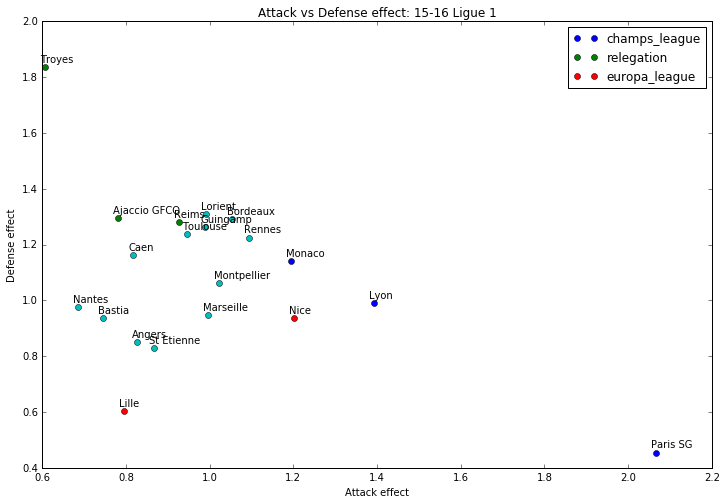

In [56]:
#Plotting the effects
fig, ax = plt.subplots(figsize=(12,8))
for outcome in ['champs_league', 'relegation', 'europa_league', '']:
    ax.plot(data_2.alpha[data_2.QR == outcome], 
    data_2.beta[data_2.QR == outcome], 'o', label=outcome)
    
for label, x, y in zip(data_2.index.values, data_2.alpha.values, data_2.beta.values):
    ax.annotate(label, xy=(x,y), xytext = (-5,5), textcoords = 'offset points')
    ax.set_title('Attack vs Defense effect: 15-16 Ligue 1')
    ax.set_xlabel('Attack effect')
    ax.set_ylabel('Defense effect')
    ax.legend()